In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Import library yang diperlukan untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

# Path to the uploaded CSV file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/flood.csv')

# Combine the first 5 and last 5 rows
df_combined = pd.concat([df.head(), df.tail()])

# Display the combined dataframe
df_combined


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515
49999,4,5,6,3,5,6,5,4,9,10,...,2,4,4,5,6,7,8,10,7,0.580


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

# **LINIER REGRESI**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler


# Data cleaning
# 1. Handling missing values by filling them with the median value of each column
df.fillna(df.median(), inplace=True)

# Check for duplicate rows
df.drop_duplicates(inplace=True)

# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memisahkan data menjadi fitur dan target
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Seleksi fitur menggunakan SelectKBest
# Pilih jumlah fitur yang diinginkan, misalnya 10 fitur terbaik
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Menampilkan fitur yang dipilih
selected_features = X.columns[selector.get_support()]
print(f'Selected features: {selected_features}')


Selected features: Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'DamsQuality', 'Siltation', 'IneffectiveDisasterPreparedness',
       'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore',
       'PoliticalFactors'],
      dtype='object')


In [ ]:
# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Melatih model regresi linier
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Membuat prediksi pada data pengujian
lr_pred = lr_model.predict(X_test)

# Mengevaluasi model
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Mean Squared Error (MSE): {lr_mse}')
print(f'R-squared (R²): {lr_r2}')


Mean Absolute Error (MAE): 0.028089214389606546
Mean Squared Error (MSE): 0.0012435752785133311
R-squared (R²): 0.5006896343022837


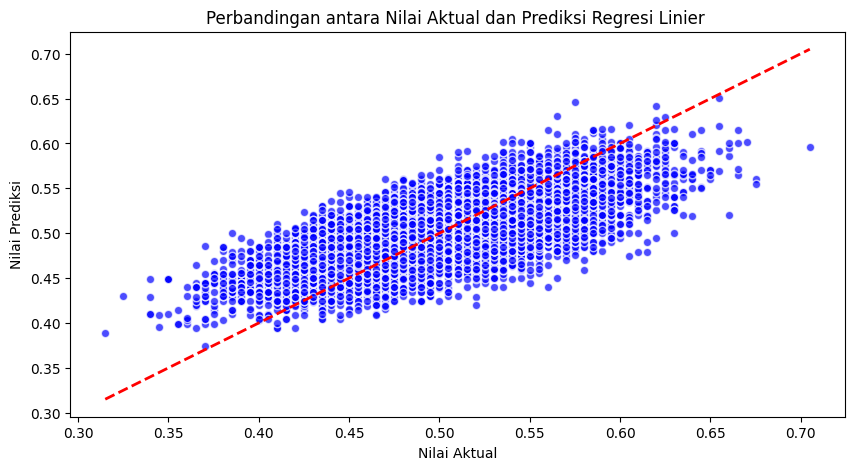

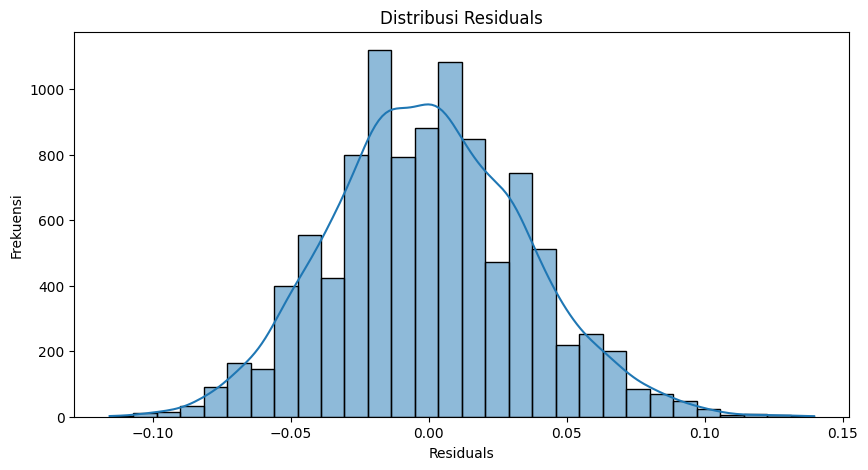

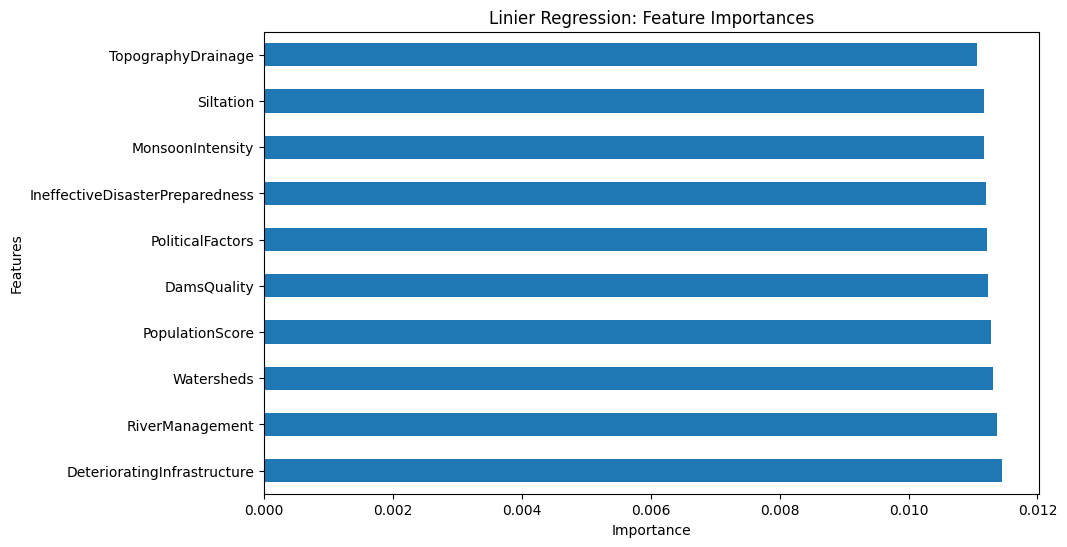

In [ ]:
# Visualisasi
# 1. Plot perbandingan antara nilai aktual dan prediksi
plt.figure(figsize=(10, 5))
plt.scatter(y_test, lr_pred, color='blue', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan antara Nilai Aktual dan Prediksi Regresi Linier ')
plt.show()

# 2. Plot residuals
residuals = y_test - lr_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residuals')
plt.show()

# Feature importance
plt.figure(figsize=(10, 6))
lr_importances = pd.Series(lr_model.coef_, index=selected_features)
lr_importances.nlargest(10).plot(kind='barh')
plt.title('Linier Regression: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## **CROSS VALIDATION LR**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Melakukan validasi silang untuk Regresi Linier
lr_model = LinearRegression()
cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Menghitung rata-rata dan standar deviasi dari hasil validasi silang
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f'Cross-Validation Mean Squared Error: {-mean_cv_score}')
print(f'Cross-Validation Std Dev: {std_cv_score}')


Cross-Validation Mean Squared Error: 1.316972466387369e-32
Cross-Validation Std Dev: 7.338397914199808e-33


In [ ]:
# Melatih model pada data pelatihan
lr_model.fit(X_train, y_train)

# Prediksi pada data pelatihan
train_pred = lr_model.predict(X_train)

# Evaluasi pada data pelatihan
train_mae = mean_absolute_error(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

print(f'Train - Mean Absolute Error (MAE): {train_mae}')
print(f'Train - Mean Squared Error (MSE): {train_mse}')
print(f'Train - R-squared (R²): {train_r2}')

# Prediksi pada data pengujian
test_pred = lr_model.predict(X_test)

# Evaluasi pada data pengujian
test_mae = mean_absolute_error(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Test - Mean Absolute Error (MAE): {test_mae}')
print(f'Test - Mean Squared Error (MSE): {test_mse}')
print(f'Test - R-squared (R²): {test_r2}')


Train - Mean Absolute Error (MAE): 9.667960876313941e-17
Train - Mean Squared Error (MSE): 1.5424156627015167e-32
Train - R-squared (R²): 1.0
Test - Mean Absolute Error (MAE): 9.827139102469573e-17
Test - Mean Squared Error (MSE): 1.5916809506789424e-32
Test - R-squared (R²): 1.0


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


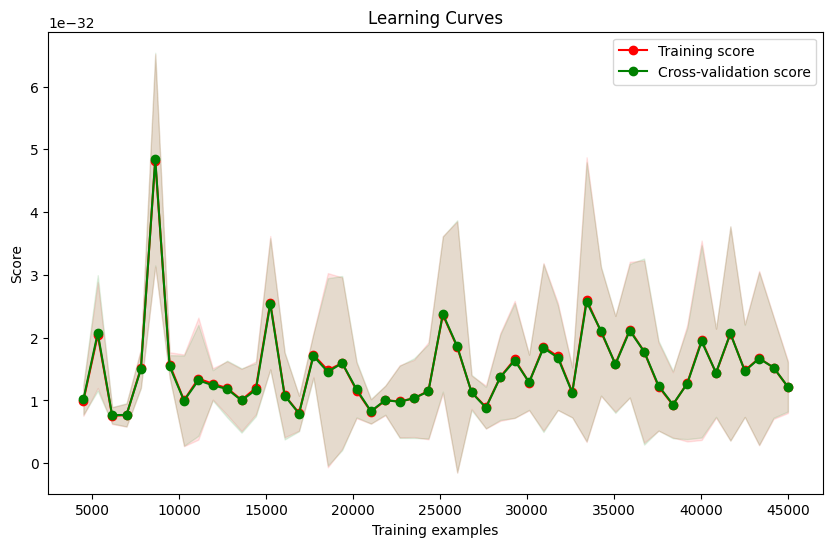

In [ ]:
from sklearn.model_selection import learning_curve

# Membuat kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

# Menghitung rata-rata dan standar deviasi dari hasil kurva pembelajaran
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot kurva pembelajaran
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


# **RANDOM FOREST**

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data cleaning
# 1. Handling missing values by filling them with the median value of each column
df.fillna(df.median(), inplace=True)

# Check for duplicate rows
df.drop_duplicates(inplace=True)

# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Memisahkan data menjadi fitur dan target
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Seleksi fitur menggunakan SelectKBest
# Pilih jumlah fitur yang diinginkan, misalnya 10 fitur terbaik
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Menampilkan fitur yang dipilih
selected_features = X.columns[selector.get_support()]
print(f'Selected features: {selected_features}')

# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)



Selected features: Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'DamsQuality', 'Siltation', 'IneffectiveDisasterPreparedness',
       'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore',
       'PoliticalFactors'],
      dtype='object')


In [ ]:

# Melatih model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model Random Forest
rf_pred = rf_model.predict(X_test)

# Mengevaluasi model Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest - Mean Absolute Error (MAE): {rf_mae}')
print(f'Random Forest - Mean Squared Error (MSE): {rf_mse}')
print(f'Random Forest - R-squared (R²): {rf_r2}')


Random Forest - Mean Absolute Error (MAE): 0.02956656516666667
Random Forest - Mean Squared Error (MSE): 0.001369261178861389
Random Forest - R-squared (R²): 0.4502252402682858


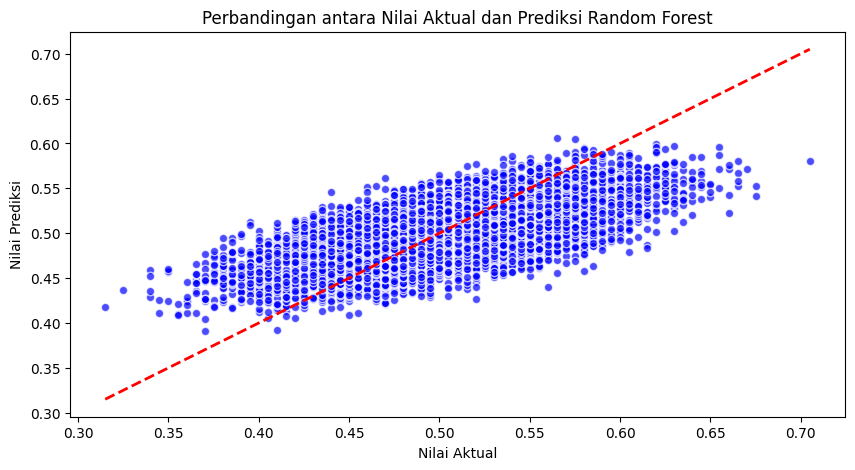

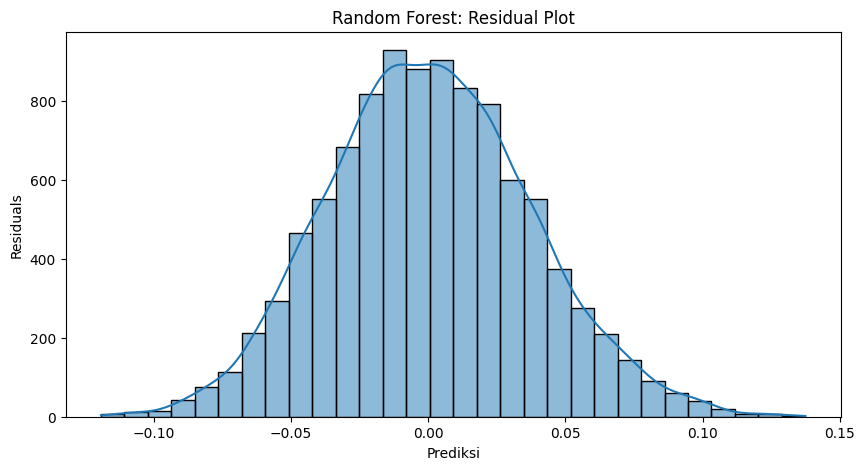

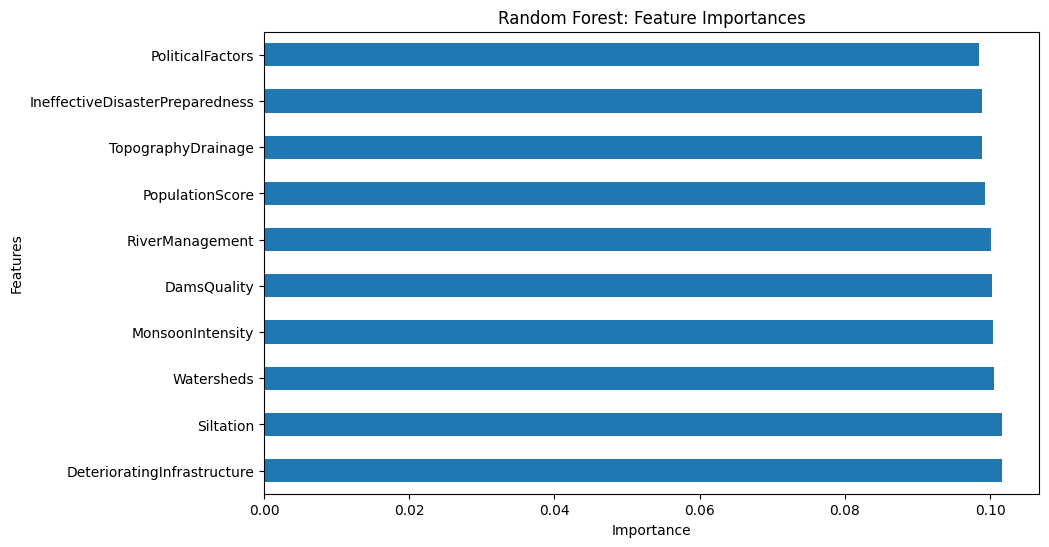

In [ ]:
# Plot perbandingan antara nilai aktual dan prediksi
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_pred, color='blue', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan antara Nilai Aktual dan Prediksi Random Forest')
plt.show()

# Visualisasi residual plot untuk Random Forest
residuals = y_test - rf_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)

#plt.figure(figsize=(10, 6))
#plt.scatter(rf_pred, y_test - rf_pred, alpha=0.6, color='r')
#plt.hlines(y=0, xmin=rf_pred.min(), xmax=rf_pred.max(), colors='k', linestyles='--')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Prediksi')
plt.ylabel('Residuals')
plt.show()

# Feature importance untuk Random Forest
plt.figure(figsize=(10, 6))
rf_importances = pd.Series(rf_model.feature_importances_, index=selected_features)
rf_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# **GRADIENT BOOSTING**

In [ ]:


# Melatih model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Membuat prediksi menggunakan model Gradient Boosting
gb_pred = gb_model.predict(X_test)

# Mengevaluasi model Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print(f'Gradient Boosting - Mean Absolute Error (MAE): {gb_mae}')
print(f'Gradient Boosting - Mean Squared Error (MSE): {gb_mse}')
print(f'Gradient Boosting - R-squared (R²): {gb_r2}')


Gradient Boosting - Mean Absolute Error (MAE): 0.029194066648237264
Gradient Boosting - Mean Squared Error (MSE): 0.0013340923796180892
Gradient Boosting - R-squared (R²): 0.46434593429841675


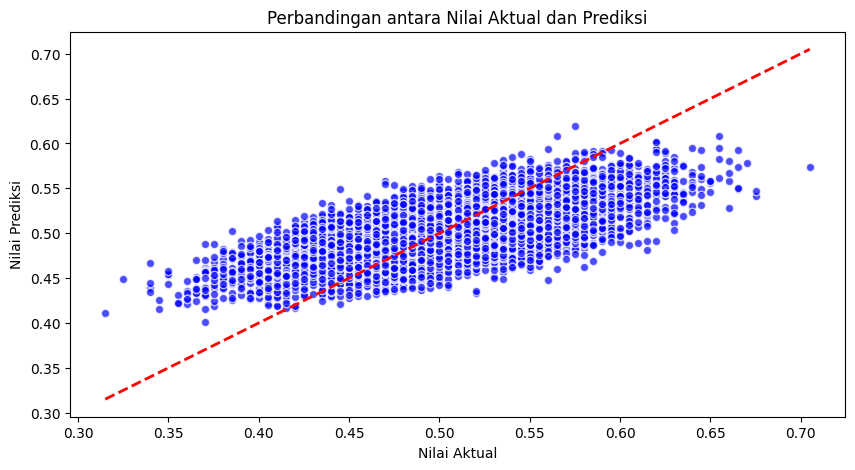

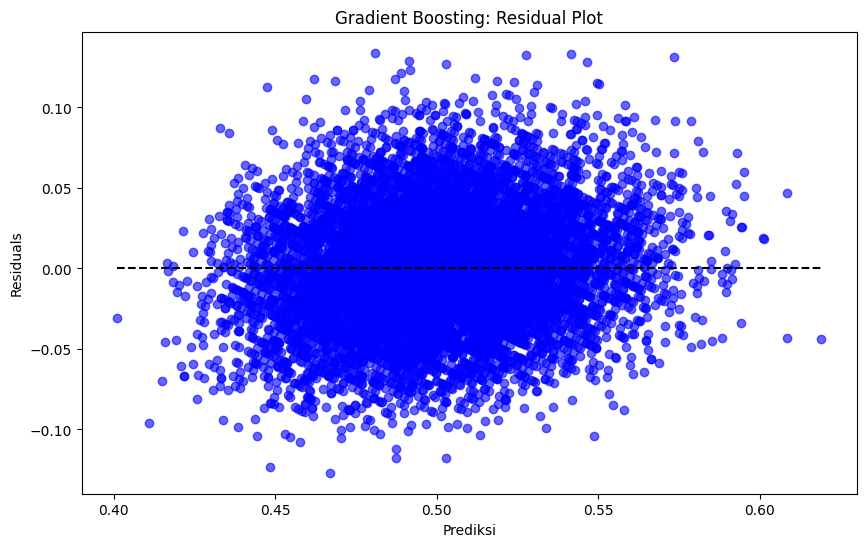

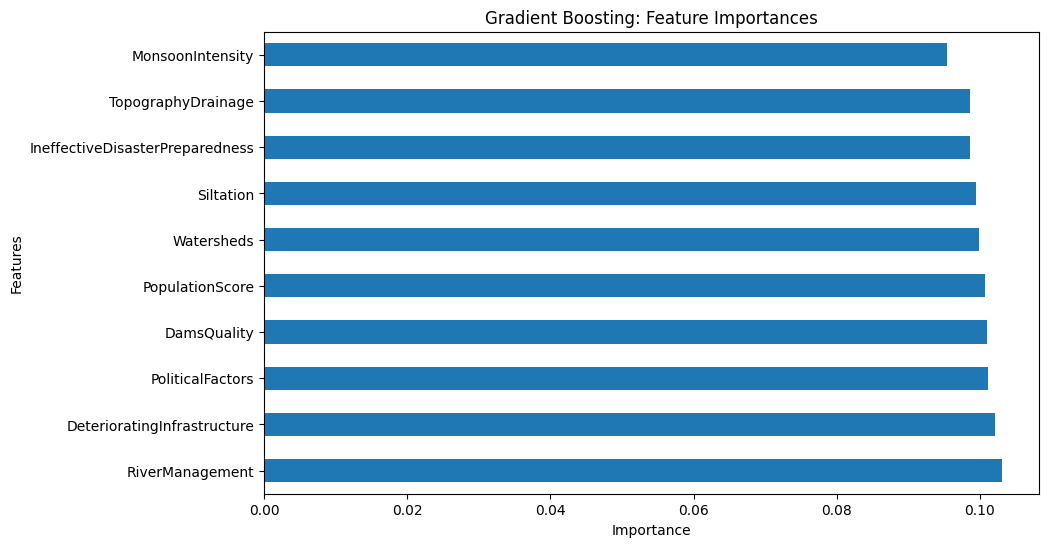

In [ ]:
# 1. Plot perbandingan antara nilai aktual dan prediksi
plt.figure(figsize=(10, 5))
plt.scatter(y_test, gb_pred, color='blue', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan antara Nilai Aktual dan Prediksi')
plt.show()

# Visualisasi residual plot untuk Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(gb_pred, y_test - gb_pred, alpha=0.6, color='b')
plt.hlines(y=0, xmin=gb_pred.min(), xmax=gb_pred.max(), colors='k', linestyles='--')
plt.title('Gradient Boosting: Residual Plot')
plt.xlabel('Prediksi')
plt.ylabel('Residuals')
plt.show()

# Feature importance untuk Gradient Boosting
plt.figure(figsize=(10, 6))
gb_importances = pd.Series(gb_model.feature_importances_, index=selected_features)
gb_importances.nlargest(10).plot(kind='barh')
plt.title('Gradient Boosting: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# **LSTM**

In [ ]:
import pandas as pd

# Path to the uploaded CSV file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/flood.csv')

# Combine the first 5 and last 5 rows
df_combined = pd.concat([df.head(), df.tail()])

# Display the combined dataframe
df_combined

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515
49999,4,5,6,3,5,6,5,4,9,10,...,2,4,4,5,6,7,8,10,7,0.580


In [ ]:

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membentuk kembali data untuk LSTM [samples, time steps, features]
# Misalkan kita menggunakan 1 time step karena tidak ada urutan waktu sebenarnya dalam data ini
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Menampilkan ringkasan model
model.summary()

# Melakukan prediksi pada set pengujian
lstm_pred = model.predict(X_test)
lstm_pred = lstm_pred.flatten()  # Flatten hasil prediksi agar memiliki dimensi yang sama dengan y_test


Epoch 1/50
1250/1250 [==============================] - 12s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0311 - val_loss: 6.0452e-05 - val_mean_absolute_error: 0.0060
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 3.3069e-05 - mean_absolute_error: 0.0044 - val_loss: 1.8406e-05 - val_mean_absolute_error: 0.0033
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3086e-05 - mean_absolute_error: 0.0027 - val_loss: 8.9788e-06 - val_mean_absolute_error: 0.0023
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 6.6161e-06 - mean_absolute_error: 0.0020 - val_loss: 5.3257e-06 - val_mean_absolute_error: 0.0018
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.8054e-06 - mean_absolute_error: 0.0015 - val_loss: 3.3549e-06 - val_mean_absolute_error: 0.0014
Epoch 6/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.7740e-06 - mean_absolute_error: 0.0013 - val_loss: 1.45

Mean Absolute Error: 0.0013047498309612313
Mean Squared Error: 2.3800877002986614e-06
R-squared: 0.9990443662876207


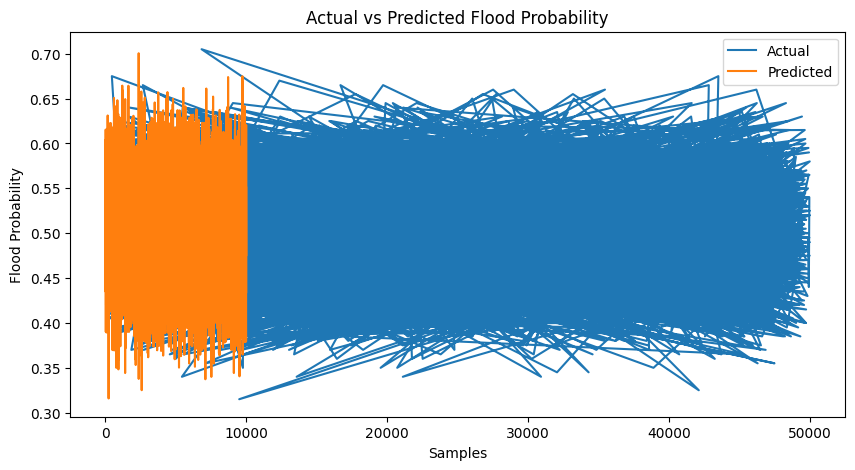

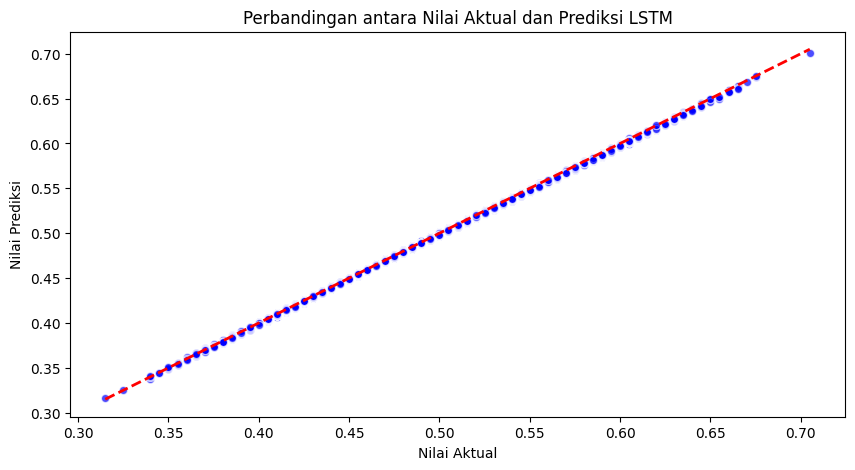

In [ ]:

# Menghitung metrik evaluasi
lstm_mae = mean_absolute_error(y_test, lstm_pred)
lstm_mse = mean_squared_error(y_test, lstm_pred)
lstm_r2 = r2_score(y_test, lstm_pred)

print(f'Mean Absolute Error: {lstm_mae}')
print(f'Mean Squared Error: {lstm_mse}')
print(f'R-squared: {lstm_r2}')

# Membuat plot prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(lstm_pred, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Flood Probability')
plt.title('Actual vs Predicted Flood Probability')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, lstm_pred, color='blue', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan antara Nilai Aktual dan Prediksi LSTM')
plt.show()

# **COMPARASI MODEL**

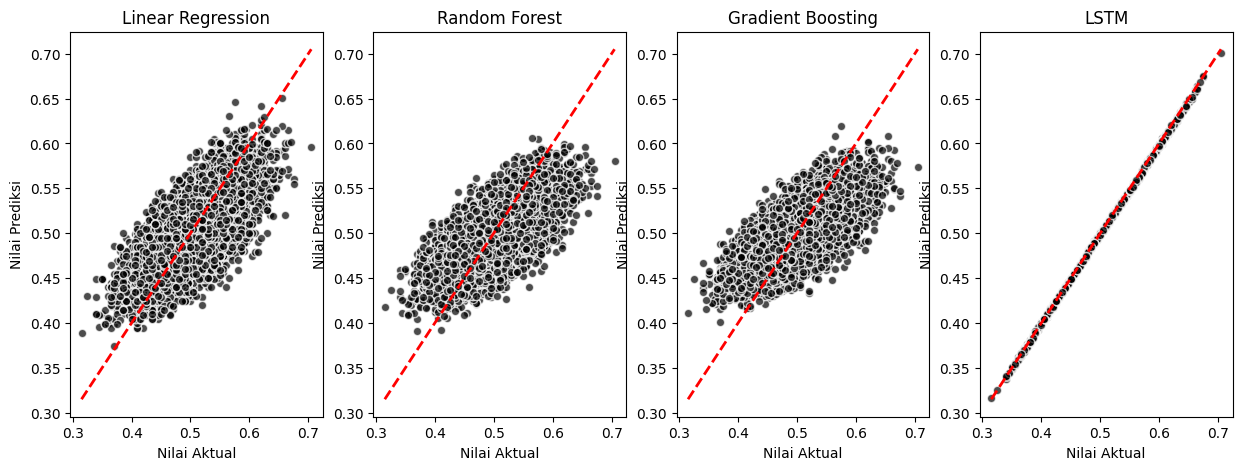

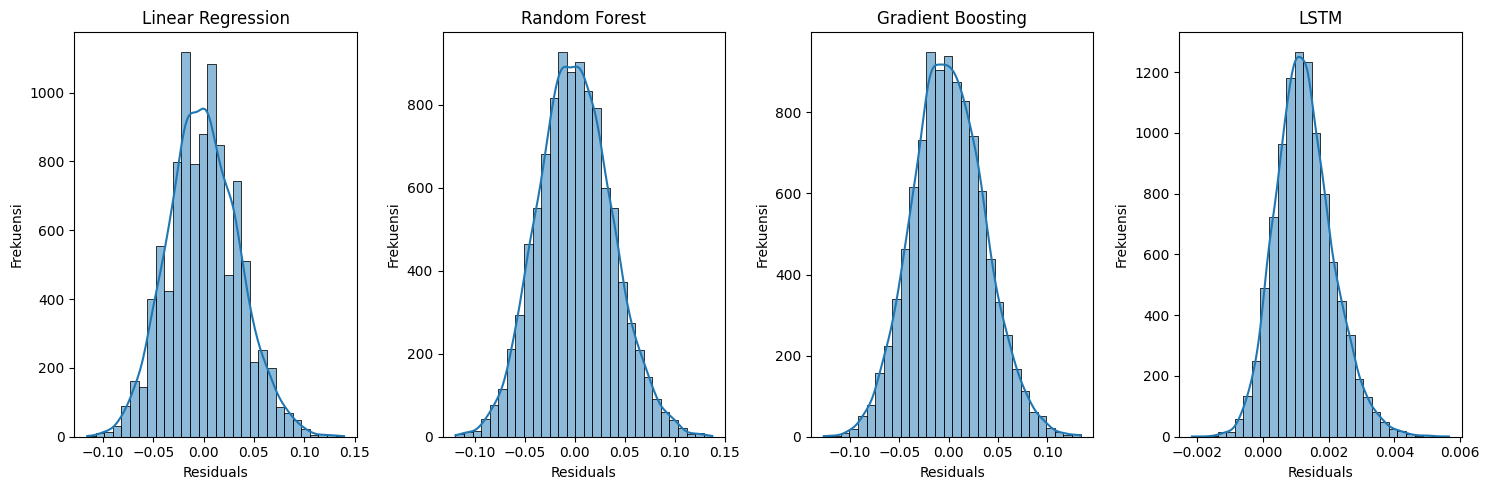

In [ ]:
# Visualisasi
# 1. Plot perbandingan antara nilai aktual dan prediksi
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(y_test, lr_pred, color='black', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Linear Regression')

plt.subplot(1, 4, 2)
plt.scatter(y_test, rf_pred, color='black', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Random Forest')

plt.subplot(1, 4, 3)
plt.scatter(y_test, gb_pred, color='black', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Gradient Boosting')

plt.subplot(1, 4, 4)
plt.scatter(y_test, lstm_pred, color='black', edgecolors='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('LSTM')

# 2. Plot residuals
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
residuals_lr = y_test - lr_pred
sns.histplot(residuals_lr, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Linear Regression')

plt.subplot(1, 4, 2)
residuals_rf = y_test - rf_pred
sns.histplot(residuals_rf, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Random Forest')

plt.subplot(1, 4, 3)
residuals_gb = y_test - gb_pred
sns.histplot(residuals_gb, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('Gradient Boosting')

plt.subplot(1, 4, 4)
residuals_lstm = y_test - lstm_pred
sns.histplot(residuals_lstm, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frekuensi')
plt.title('LSTM')


plt.tight_layout()
plt.show()